In [129]:
#Imports
from math import *
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split

sns.set(font_scale=2.0)
sns.set_style("ticks")
sns.set_palette(palette='deep')
sns.set_color_codes(palette='deep')
mpl.rcParams.update({'font.family': 'serif', 'font.serif':'DejaVu Serif'})

%matplotlib notebook

In [2]:
#Outlier at row 15870 confirmed to be incorrect data
House_DataFrame = pd.read_csv('kc_house_data.csv').drop(15870,axis=0)

target = House_DataFrame['price'].values
data = House_DataFrame.drop(['id','price'],axis=1).values

In [3]:
train_data, test_data, train_target, test_target = train_test_split(data, target, train_size=0.5, random_state=123)
print("Labels for training and testing data")
print(train_target)
print(test_target)

Labels for training and testing data
[ 541100.  799990.  439950. ...,  425000.  640000.  500000.]
[ 150000.  279000.  435000. ...,  692500.  370000.  988500.]


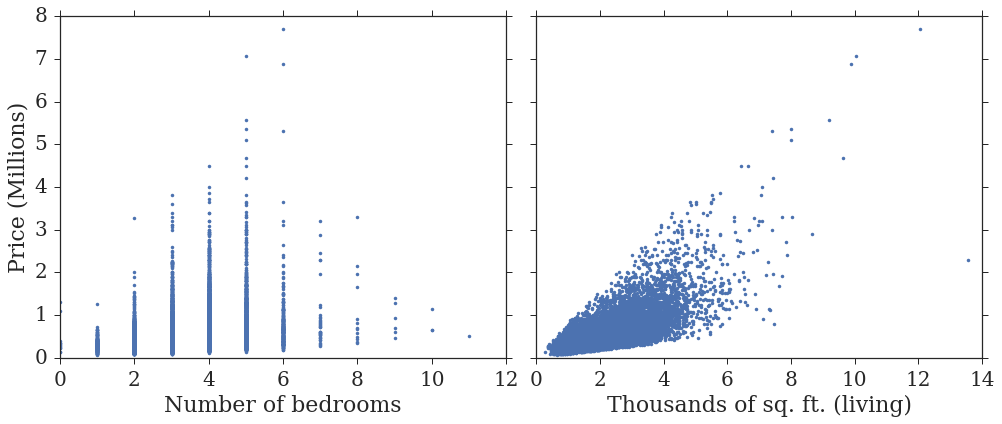

In [10]:
fig,ax = plt.subplots(1,2,sharey=True,figsize=(14, 6))
ax[0].plot(data[:,1],target/10**6,marker='.',linestyle='None')
ax[0].set_xlabel('Number of bedrooms')
ax[0].set_ylabel('Price (Millions)')
ax[1].plot(data[:,3]/1000,target/10**6,marker='.',linestyle='None')
ax[1].set_xlabel('Thousands of sq. ft. (living)')
plt.tight_layout()

In [227]:
latitude = House_DataFrame['lat'].values
longitude = House_DataFrame['long'].values
long_lat_price = House_DataFrame[['long','lat','price']].values

long_binsize = (xedges[-1] - xedges[0])/xedges.size #Longitude binsize
lat_binsize = (yedges[-1] - yedges[0])/yedges.size #Latitude binsize
binsize = np.array([lat_binsize,long_binsize]) #Array of binsizes

PopulatedElements = np.where(lat_long_histogram==1) #Find locations that are populated, i.e. have data
PopulatedIndices = np.vstack((PopulatedElements[0],PopulatedElements[1])).T #Array of populated indices
PopulatedBins = PopulatedIndices*binsize + np.array([xedges[0], yedges[0]]) #Array of populated bins (by edges)

In [415]:
#Histogram of latitude and longitude
NumBins = 40
denominator, xedges, yedges = np.histogram2d(longitude,latitude,bins=NumBins)
numerator, _, _ = np.histogram2d(longitude,latitude,bins=[xedges, yedges], weights=lat_long_price[:,2])
Histogram = numerator/denominator
Histogram[Histogram==0] = np.nan
HistogramMasked = np.ma.masked_invalid(Histogram)

<IPython.core.display.Javascript object>


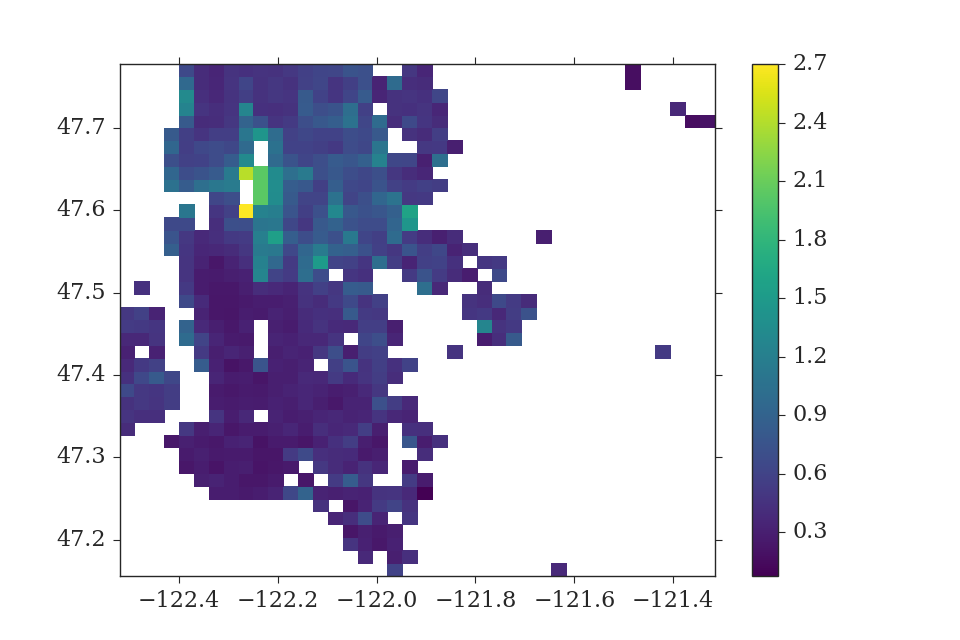

(47.155900000000003, 47.7776)

In [420]:
extent = [yedges[0], yedges[-1], xedges[0], xedges[-1]]
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)
im = ax.pcolormesh(xedges,yedges,HistogramMasked.T*10**-6, cmap='viridis')
fig.colorbar(im, ax=ax)
ax.set_xlim(xedges[0],xedges[-1])
ax.set_ylim(yedges[0],yedges[-1])

In [372]:
lat_long_price[2899,2]
for idx in np.where((lat_long_price[:,1]>-122.219) & (lat_long_price[:,1]<-122.213)
                     & (lat_long_price[:,0]<47.65) & (lat_long_price[:,0]>47.647)):
    print(np.mean(lat_long_price[idx,2]))

2113000.0


In [417]:
np.min(Histogram[np.isnan(Histogram)==False])

75000.0

<IPython.core.display.Javascript object>


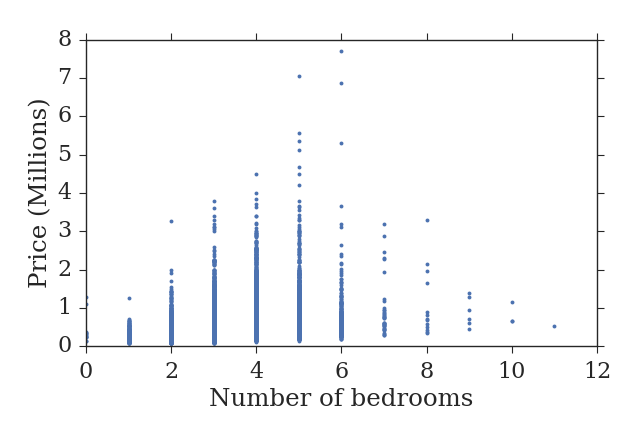

In [421]:
plt.figure()
plt.plot(data[:,1],target/10**6,marker='.',linestyle='None')
plt.xlabel('Number of bedrooms')
plt.ylabel('Price (Millions)')
#plt.semilogy()
plt.tight_layout()

In [ ]:
linreg = LinearRegression()
knnreg = KNeighborsRegressor(n_neighbors=1)